# CL04 - Projet P24

Dans le cadre de l'UE CL04, nous effectuons des simulations sur le stock d'un magasin, afin d'évaluer le résultat en fonction 

## Import des données et librairies

Dans un premier temps, nous allons importer les différentes librairies utilisées pour la suite :



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join

Ensuite, nous allons utiliser les 7 fichiers générés par les fichier stock_simulation.py et add_cost.py, pour répondre aux différentes questions.

In [12]:
path = "G:\\Mon Drive\\COURS\\GI06\\IF29\\Stock_Simulation\\Export_stp2"
files = [f for f in listdir(path) if isfile(join(path, f))]
display(files)

['STP2_CL04_export_1000_K10.csv',
 'STP2_CL04_export_1000_K00.csv',
 'STP2_CL04_export_1000_K20.csv',
 'STP2_CL04_export_1000_K30.csv',
 'STP2_CL04_export_1000_K40.csv',
 'STP2_CL04_export_1000_K50.csv',
 'STP2_CL04_export_1000_K60.csv']

### Paramètres valeurs

In [44]:
lambda1 = 15 #Commande hors ligne
lambda2 = 30 #Commande en ligne
L = 1 #Délai de livraison approvisionnement
W=1 # Délai acceptable pour une commande en ligne
F=18 #Cout de passation de commande
h = 0.05 #Cout de stockage
p = 20 #Cout de perte unitaire
b = 5 #Indemnité de retard
Q = 180 #Quantité de commande
r = 60 #Point de recommande

Pour comprendre la suite, nous allons tout d'abord décrire les colonnes qui seront utilisés par la suite.

In [42]:
#Put table in Pandas DataFrame
K10_timeline = pd.read_csv(path + "\\"+files[0],index_col=0)
display(K10_timeline.head())

,time,event_type,stock,attente,perte_magasin,deliv,late_cost,passation_cost,Time_gap,stock_cost,Loss_cost,Total_cost,Cum_cost,mean_cost
0,0.000000,0,60,0,0,0,0.0,0,0.013976,0.041928,0,0.041928,0.041928,inf
1,0.013976,2,59,0,0,1,0.0,0,0.000028,0.000084,0,0.000084,0.042012,3.006014
2,0.014004,2,58,0,0,1,0.0,0,0.040593,0.117719,0,0.117719,0.159731,11.405751
3,0.054597,2,57,0,0,1,0.0,0,0.024283,0.069208,0,0.069208,0.228939,4.193223
4,0.078881,2,56,0,0,1,0.0,0,0.014046,0.039329,0,0.039329,0.268268,3.400930


## Calcul des indicateurs de performance pour les paramètres de bases.

Par défaut, le paramètre de priorisation K vaut 10, et c'est avec cette valeur que nous allons étudier l'évolution du stock (fichier STP2_CL04_export_1000_K10.csv )

Les premiers indicateurs à étudier sont le niveau moyen de stock, le pourcentage de perte de commande en magasin, le pourcentage de commande en retard et le cout moyen total du stock. 

In [43]:
#Niveau moyen de stock
stock_avg = sum(K10_timeline["stock"]*K10_timeline["Time_gap"])/K10_timeline.time.max()
print("Le niveau de stock moyen vaut : ",stock_avg)
#Perte en magasin
total_magasin = K10_timeline.where(K10_timeline.event_type == 1).deliv.count()
perte_magasin = K10_timeline.where(K10_timeline.event_type == 1).perte_magasin.sum()
perte_mag_ratio = perte_magasin/total_magasin
print("Le pourcentage de perte sur le magasin vaut : ",perte_mag_ratio)
#Attente en ligne
total_ligne = K10_timeline.where(K10_timeline.event_type == 2).deliv.count()
perte_ligne = K10_timeline.where(K10_timeline.event_type == 2).where(K10_timeline.deliv == 0).deliv.count()
perte_ligne_ratio = perte_ligne/total_ligne
print("Le pourcentage d'attente en ligne vaut : ",perte_ligne_ratio)
#Cout total moyen 
avg_total_cost = K10_timeline.iloc[-1].mean_cost
print("Le cout moyen vaut : ",avg_total_cost)

Le niveau de stock moyen vaut :  103.80994024283368
Le pourcentage de perte sur le magasin vaut :  0.005146557600545331
Le pourcentage d'attente en ligne vaut :  0.007000804882956603
Le cout moyen vaut :  11.257575676574929


Pour comprendre plus en détail le fonctionnement, nous pouvons faire un focus sur une période de quelques approvisionnement pour voir l'évolution du stock.

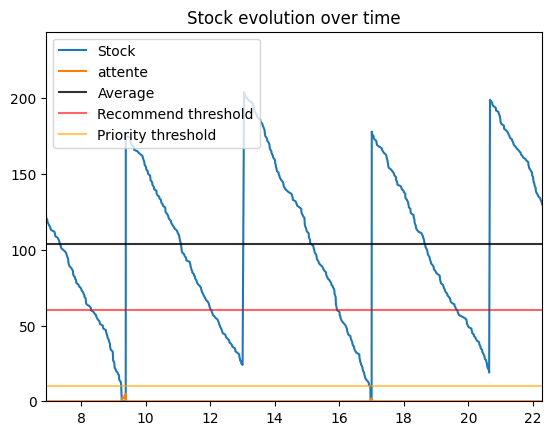

In [55]:
Timeline = K10_timeline.loc[300:1000]
K = 10

def line_plot(x,serie,col="black",al=1 ,lab = ""):
    plt.plot([0,max(serie)],[x,x],c=col,alpha = al,label = lab)



#Plot the stock
plt.plot(Timeline.time, Timeline.stock,label = "Stock")
plt.plot(Timeline.time, Timeline.attente,label = "attente")
line_plot(stock_avg,Timeline.time,"black",0.8,"Average")
line_plot(r,Timeline.time,"red",0.6,"Recommend threshold")
line_plot(K,Timeline.time,"orange",0.6,"Priority threshold")
plt.title("Stock evolution over time")
plt.xlim(min(Timeline.time),max(Timeline.time))
plt.ylim(min(Timeline.stock),max(Timeline.stock)+40)
plt.legend()
plt.show()

In [ ]:
#Plot the cost
plt.plot(Timeline.time,Timeline.mean_cost)
plt.show()